# LAB 4 Classification

## 1. The Stock Market Data

In [8]:
# setup
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('precision', 2) # 소수점 2째 자리까지
pd.set_option('display.max_rows', 12) # 최대 12행까지만 보이게
pd.set_option('display.float_format', '{:20,.2f}'.format) # scientific notation 없애기
plt.style.use('seaborn')

In [2]:
# data load하기
smarket = pd.read_csv('C:/Users/admin/Desktop/Yonsei/ESC/20_Summer_Break/ESC_ML_STUDY/datasets/Smarket.csv', index_col=0)
smarket.Direction = smarket.Direction.astype('category')
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up
2,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up
3,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down
4,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up
5,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.42,0.25,-0.02,-0.58,-0.28,1.89,0.04,Up
1247,2005,0.04,0.42,0.25,-0.02,-0.58,1.29,-0.95,Down
1248,2005,-0.95,0.04,0.42,0.25,-0.02,1.54,0.13,Up
1249,2005,0.13,-0.95,0.04,0.42,0.25,1.42,-0.30,Down


In [3]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
smarket.shape

(1250, 9)

In [5]:
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,"1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00",1250
unique,nan,nan,nan,nan,nan,nan,nan,nan,2
top,nan,nan,nan,nan,nan,nan,nan,nan,Up
freq,nan,nan,nan,nan,nan,nan,nan,nan,648
mean,"2,003.02",0.00,0.00,0.00,0.00,0.01,1.48,0.00,NaN
std,1.41,1.14,1.14,1.14,1.14,1.15,0.36,1.14,NaN
min,"2,001.00",-4.92,-4.92,-4.92,-4.92,-4.92,0.36,-4.92,NaN
25%,"2,002.00",-0.64,-0.64,-0.64,-0.64,-0.64,1.26,-0.64,NaN
50%,"2,003.00",0.04,0.04,0.04,0.04,0.04,1.42,0.04,NaN
75%,"2,004.00",0.60,0.60,0.60,0.60,0.60,1.64,0.60,NaN


In [6]:
smarket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null category
dtypes: category(1), float64(7), int64(1)
memory usage: 89.3 KB


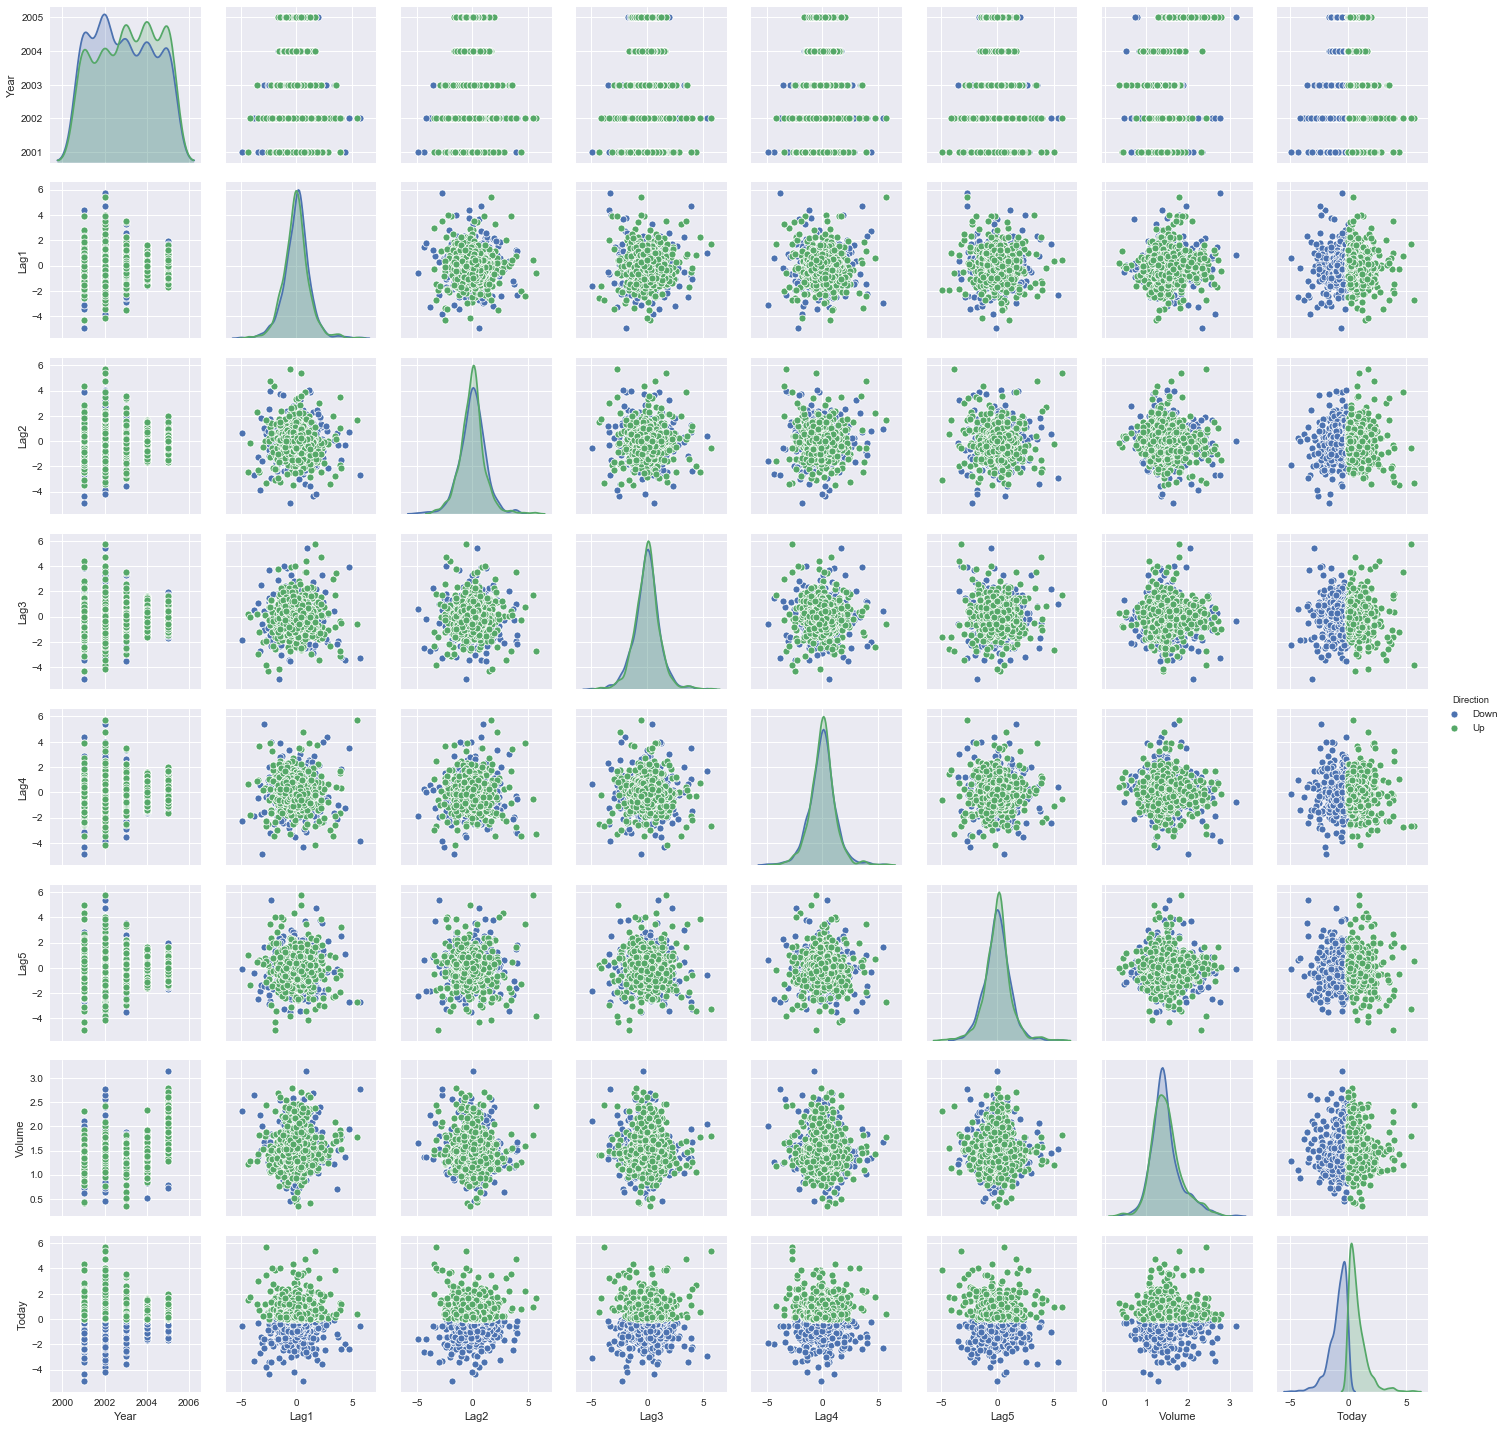

In [9]:
sns.pairplot(smarket, hue='Direction')

In [10]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,0.03,0.03,0.03,0.04,0.03,0.54,0.03
Lag1,0.03,1.00,-0.03,-0.01,-0.00,-0.01,0.04,-0.03
Lag2,0.03,-0.03,1.00,-0.03,-0.01,-0.00,-0.04,-0.01
Lag3,0.03,-0.01,-0.03,1.00,-0.02,-0.02,-0.04,-0.00
Lag4,0.04,-0.00,-0.01,-0.02,1.00,-0.03,-0.05,-0.01
Lag5,0.03,-0.01,-0.00,-0.02,-0.03,1.00,-0.02,-0.03
Volume,0.54,0.04,-0.04,-0.04,-0.05,-0.02,1.00,0.01
Today,0.03,-0.03,-0.01,-0.00,-0.01,-0.03,0.01,1.00


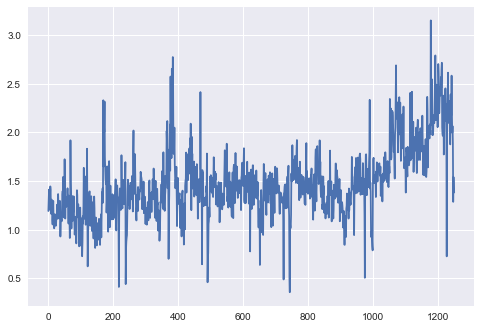

In [12]:
plt.plot(smarket.Volume);

## 2. Logistic Regression

### Using Statsmodel

In [14]:
import statsmodels.api as sm

X_sm = smarket.loc[:,'Lag1':'Volume']
y_sm = pd.get_dummies(smarket.Direction).iloc[:,1] # dummy incoding

glm_fit_sm = sm.Logit(y_sm, sm.add_constant(X_sm)).fit()
print(glm_fit_sm.summary())

Optimization terminated successfully.
         Current function value: 2.197001
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                     inf
Time:                        02:22:47   Log-Likelihood:                -2746.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [15]:
glm_fit_sm.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

In [16]:
glm_fit_sm.pred_table()

array([[145., 457.],
       [141., 507.]])

### Using scikit-learn

In [20]:
from sklearn.linear_model import LogisticRegression

X_sk = smarket.loc[:,'Lag1':'Volume']
y_sk = smarket.Direction

glm_model = LogisticRegression(fit_intercept=True, C=1e9) # C값이 작을수록 정규화를 강하게 해줌. 즉, 베타 계수 값을 작게 만들어줌. overfitting 가능성 줄어듦.
glm_fit = glm_model.fit(X_sk, y_sk)

In [21]:
#계수값 확인
glm_fit.intercept_, glm_fit.coef_

(array([-0.12600781]),
 array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
          0.13544567]]))

In [24]:
#0일 확률과 1일 확률 그리고 어떻게 분류 되었는지 확인
pd.DataFrame({'prob_0': glm_fit.predict_proba(X_sk)[:,0],
              'prob_1': glm_fit.predict_proba(X_sk)[:,1],
              'pred_class': glm_fit.predict(X_sk)},
             columns=['prob_0', 'prob_1','pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.52,0.48,Down
2,0.52,0.48,Down
3,0.48,0.52,Up
4,0.49,0.51,Up
...,...,...,...
1245,0.48,0.52,Up
1246,0.49,0.51,Up
1247,0.46,0.54,Up
1248,0.47,0.53,Up


In [25]:
# Confusion Matrix 그리기

from sklearn.metrics import confusion_matrix, accuracy_score

conf_m = pd.DataFrame(confusion_matrix(y_sk, glm_fit.predict(X_sk)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,145,457
1,141,507


In [27]:
# Accuracy와 Training Error 구하기

print('Accuracy:', str(accuracy_score(y_sk, glm_fit.predict(X_sk))))
print('Training Error:', str(1-accuracy_score(y_sk, glm_fit.predict(X_sk))))

Accuracy: 0.5216
Training Error: 0.47840000000000005


In [28]:
# 연도 기준으로 training set과 test set 나누기

train = smarket.loc[smarket.Year < 2005]
test = smarket.loc[smarket.Year >= 2005]